<a href="https://colab.research.google.com/github/juszhou/NYUML/blob/main/Copy_of_demo_tf_keras_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

Keras: https://keras.io/

### Define the neural network model


Using the Keras Sequential API we define a model with three fully connected layers. 
- The first layer has an input with size of $[\texttt{batch_size}, \texttt{d0}, \texttt{d1}]$. However, in the input shape argument we only need to specify $[\texttt{d0}, \texttt{d1}]$, if the input does not have a second dimension $\texttt{d1}$ then in the input shape argument we can write $(\texttt{d0}, )$.
- The first layer also has an activation function, which we can specify using the activation argument, common choices are ReLU, sigmoid, tanh and linear. 
- By simply adding another Dense object layer to the Sequential model we can build the second layer.

<img src="https://miro.medium.com/max/1400/1*ZB6H4HuF58VcMOWbdpcRxQ.png" alt="NN_Image" width="400">

In [2]:
model = Sequential([
    Dense(5, activation='relu', input_shape=(4,)),
    Dense(7, activation='relu'),
    Dense(3, activation='linear')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(
    optimizer='adam', # 'rmsprop', 'sgd'
    loss='mean_squared_error', # 'mae'
    metrics='mse'
)

### Generate random data

In this example we will try to fit the curve
$$f(x) = x\cos(x) + \sin^2(x)$$

In [6]:
X_train = tf.random.uniform(shape=[1000, ], minval=0, maxval=10)
Y_train = X_train * tf.cos(X_train) + tf.sin(X_train) ** 2 + 0.5*tf.random.normal(shape=[1000, ])

X_test = tf.random.uniform(shape=[500, ], minval=0, maxval=10)
Y_test = X_test * tf.cos(X_test) + tf.sin(X_test) ** 2 + 0.5*tf.random.normal(shape=[500, ])

Now we can visualize the data, note that since the data is not sorted we should use a scatter plot.

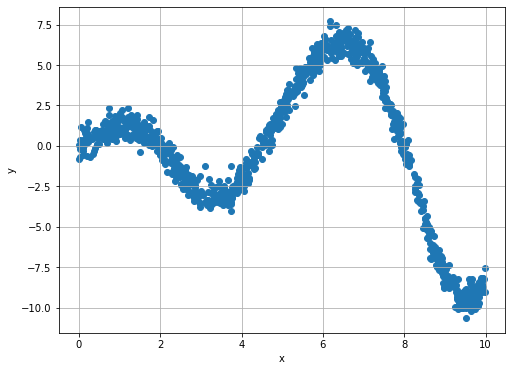

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(X_train.numpy(), Y_train.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

### Training

Using the generated data we can train the neural network model, we train it for 500 epochs (one epoch is one pass over the entire dataset) with a batch size of 64.

In [10]:
# training_history = model.fit(features, labels, epochs=epochs, batch_size=batch_size)
history = model.fit(X_train, Y_train, epochs=1000, batch_size=32)

Epoch 1/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.2858 - mse: 4.2858
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.2668 - mse: 4.2668
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.2110 - mse: 4.2110
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 4.2380 - mse: 4.2380
Epoch 5/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.1637 - mse: 4.1637
Epoch 6/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.1308 - mse: 4.1308
Epoch 7/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.1077 - mse: 4.1077
Epoch 8/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.0451 - mse: 4.0451
Epoch 9/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.0146 - mse: 4.0146
Epoch 10/1000
32/32 [==============================] - 0s 1ms/step - loss: 3.9432 - mse: 3.9432
Epoch 11/1000
32/32 [============================

In [11]:
print(history.history)

{'loss': [4.285789966583252, 4.26676607131958, 4.211024761199951, 4.238039016723633, 4.163686752319336, 4.130791664123535, 4.107730865478516, 4.045074462890625, 4.014596939086914, 3.943190336227417, 3.915811061859131, 3.879254102706909, 3.8359317779541016, 3.817566394805908, 3.754333972930908, 3.7087132930755615, 3.657888650894165, 3.6266555786132812, 3.5743396282196045, 3.521683931350708, 3.464536666870117, 3.420193910598755, 3.368394374847412, 3.320223093032837, 3.267728328704834, 3.3282744884490967, 3.2029945850372314, 3.135795831680298, 3.095787286758423, 3.068643093109131, 3.0518741607666016, 2.9689695835113525, 2.937159776687622, 2.8843491077423096, 2.8638083934783936, 2.7944657802581787, 2.778143882751465, 2.751736879348755, 2.716809034347534, 2.676292657852173, 2.6521902084350586, 2.619974374771118, 2.619490146636963, 2.554969072341919, 2.515937089920044, 2.5522665977478027, 2.4956796169281006, 2.469491481781006, 2.449583053588867, 2.457613468170166, 2.3870739936828613, 2.36647

### Evaluate the performance of the model

Using the `model.predict()` method we can evaluate the performance of our model on the testing dataset and compare it with the corresponding ground truth data.

In [12]:
# prediction = model.predict(features)
y_hat = model.predict(X_test)

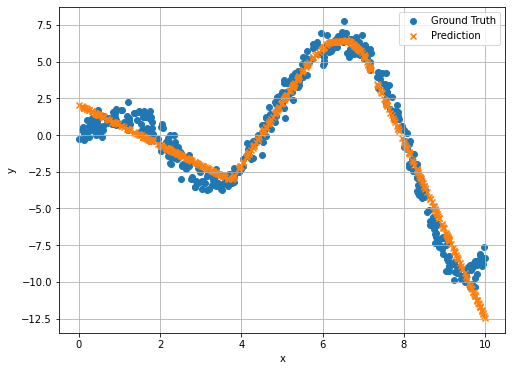

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X_test.numpy(), Y_test.numpy(), label='Ground Truth')
plt.scatter(X_test.numpy(), y_hat, marker='x', label='Prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [14]:
print(history.history)
loss_history = history.history['loss']

{'loss': [4.285789966583252, 4.26676607131958, 4.211024761199951, 4.238039016723633, 4.163686752319336, 4.130791664123535, 4.107730865478516, 4.045074462890625, 4.014596939086914, 3.943190336227417, 3.915811061859131, 3.879254102706909, 3.8359317779541016, 3.817566394805908, 3.754333972930908, 3.7087132930755615, 3.657888650894165, 3.6266555786132812, 3.5743396282196045, 3.521683931350708, 3.464536666870117, 3.420193910598755, 3.368394374847412, 3.320223093032837, 3.267728328704834, 3.3282744884490967, 3.2029945850372314, 3.135795831680298, 3.095787286758423, 3.068643093109131, 3.0518741607666016, 2.9689695835113525, 2.937159776687622, 2.8843491077423096, 2.8638083934783936, 2.7944657802581787, 2.778143882751465, 2.751736879348755, 2.716809034347534, 2.676292657852173, 2.6521902084350586, 2.619974374771118, 2.619490146636963, 2.554969072341919, 2.515937089920044, 2.5522665977478027, 2.4956796169281006, 2.469491481781006, 2.449583053588867, 2.457613468170166, 2.3870739936828613, 2.36647

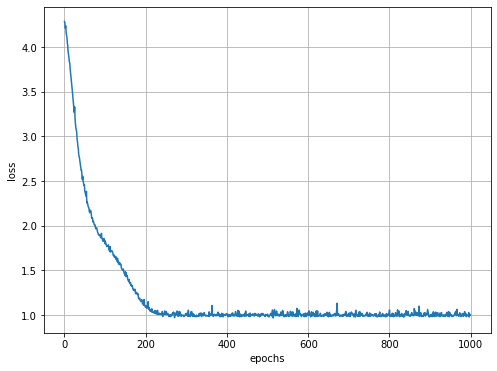

In [15]:
plt.figure(figsize=(8,6))
plt.plot(loss_history)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

### Summary

We can see that using Keras' Sequential API we can build a functional neural network using very few lines of code.
```
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics='mse'
)

history = model.fit(X_train, Y_train, epochs=500, batch_size=32)
```